In [79]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('IOT-temp.csv')

In [80]:
df.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          97606 non-null  object
 1   room_id/id  97606 non-null  object
 2   noted_date  97606 non-null  object
 3   temp        97606 non-null  int64 
 4   out/in      97606 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.7+ MB


In [82]:
df.drop(["room_id/id"], axis = 1, inplace = True) 
df['noted_date'] = pd.to_datetime(df['noted_date'])

In [83]:
ts_df = df.set_index(['noted_date'])

In [84]:
ts_df.head()

,id,temp,out/in
noted_date,,,
2018-08-12 09:30:00,__export__.temp_log_196134_bd201015,29,In
2018-08-12 09:30:00,__export__.temp_log_196131_7bca51bc,29,In
2018-08-12 09:29:00,__export__.temp_log_196127_522915e3,41,Out
2018-08-12 09:29:00,__export__.temp_log_196128_be0919cf,41,Out
2018-08-12 09:29:00,__export__.temp_log_196126_d30b72fb,31,In


<AxesSubplot:xlabel='noted_date'>

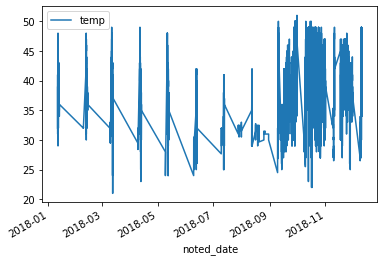

In [85]:
df=ts_df.groupby(ts_df.index).mean()
df.plot()

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

Text(0, 0.5, 'Temperature')

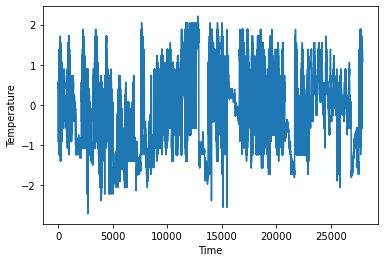

In [87]:
plt.plot(df_scaled)
plt.xlabel('Time')
plt.ylabel('Temperature')

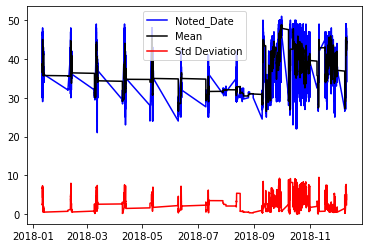

In [88]:
temp = df.loc[:,['temp']]
rol_mean = temp.rolling(window=52).mean()
rol_std = temp.rolling(window=52).std()

plt.plot(temp, c='blue')
plt.plot(rol_mean, c='black')
plt.plot(rol_std, c='red')

plt.legend([ "Noted_Date", "Mean", "Std Deviation"])

In [89]:
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(temp["temp"])
print(adftest)

(-7.502398576447131, 4.2198170235298004e-11, 42, 27877, {'1%': -3.43058459849508, '5%': -2.861643685903541, '10%': -2.5668251888927816}, 152413.84734850161)


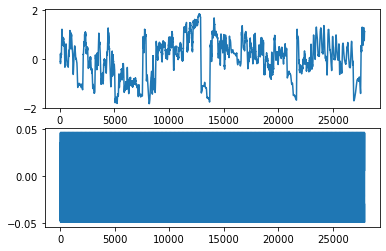

In [90]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df_scaled, period = 52)

trend= decompose.trend
season = decompose.seasonal

plt.subplot(211)
plt.plot(trend)
plt.subplot(212)
plt.plot(season)

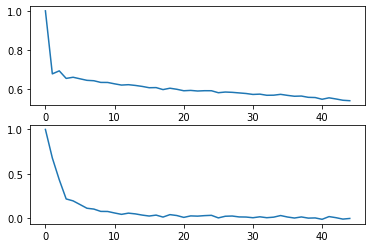

In [91]:
from statsmodels.tsa.stattools import acf,pacf

acf_plot = acf(df_scaled)
pacf_plot = pacf(df_scaled)

plt.subplot(211)
plt.plot(acf_plot)
plt.subplot(212)
plt.plot(pacf_plot)

In [92]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_scaled, order=(1,0,3))
model_fit = model.fit()

In [93]:
res = model_fit.forecast(104)

In [94]:
res = pd.DataFrame(res)
res.columns=['temp']
pred = pd.DataFrame(df_scaled)
pred = pred.append(res)

C:\Users\Adithi V\AppData\Local\Temp\ipykernel_12552\3375481233.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred = pred.append(res)


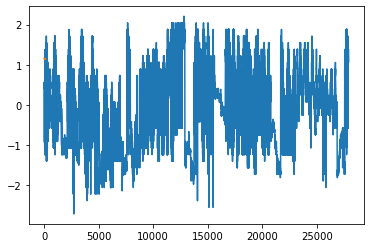

In [95]:
plt.plot(pred)